##### Dataset

In [1]:
# Mall_Customer.csv
#location: https://mitu.co.in/dataset

##### Import the libraries

In [70]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##### Load the dataset

In [3]:
df = pd.read_csv('datasets/Mall_Customers.csv')
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


##### Separate the input 

In [4]:
x = df[['Annual Income (k$)','Spending Score (1-100)']]
# or x = df.iloc[:,[3,4]]

In [5]:
x

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [6]:
# above both are almost same scale , hence no scaling is required

##### Visualize

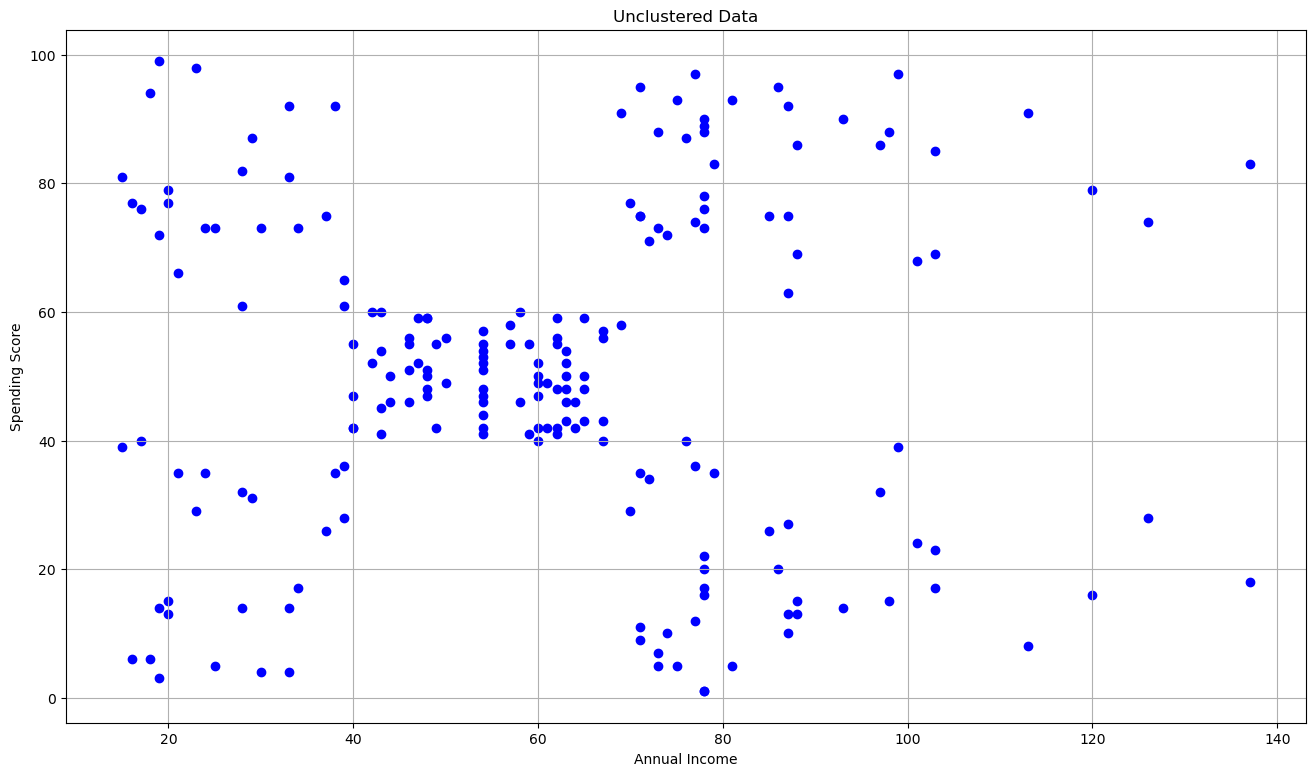

In [7]:
plt.figure(figsize=(16,9))
plt.title('Unclustered Data')
plt.grid()
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.scatter(x.iloc[:,0], x.iloc[:,1], color = 'b', marker = 'o')

##### Elbow Method

In [8]:
from sklearn.cluster import KMeans

In [16]:
km = KMeans(random_state= 0, n_clusters= 7)

In [17]:
km.fit(x)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=7, random_state=0)

In [15]:
# Sum squared Error
km.inertia_

44448.45544793371

In [19]:
sse = []
for k in range(1,16):
    km = KMeans(random_state=0, n_clusters= k, n_init=10)
    km.fit(x)
    sse.append(km.inertia_)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

In [20]:
sse

[269981.28,
 181363.595959596,
 106348.3730621112,
 73679.78903948834,
 44448.45544793371,
 37265.86520484346,
 30259.65720728547,
 25095.703209997544,
 21830.041978049434,
 20736.67993892412,
 17702.595932296277,
 15810.838613705502,
 14763.330402558206,
 13165.329070181626,
 12064.939000692291]

In [21]:
# decreasing as the value of k(no of centroids) increases 

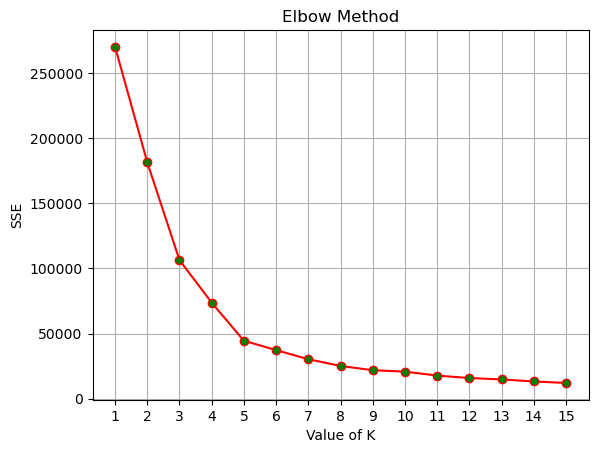

In [22]:
plt.title('Elbow Method')
plt.grid()
plt.xlabel('Value of K')
plt.ylabel('SSE')
plt.xticks(range(1,16))
plt.plot(range(1,16), sse, color = 'red', marker = 'o', mfc = 'green')

In [24]:
pip install kneed

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [25]:
from kneed import KneeLocator

In [26]:
kl = KneeLocator(range (1,16), sse, curve = "convex", direction = "decreasing")

In [27]:
kl.elbow

5

##### Silhoutte Score

In [28]:
from sklearn.metrics import silhouette_score

In [30]:
km.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [31]:
silh = []
for k in range(2,16):
    km = KMeans(random_state= 0 , n_clusters = k, n_init= 10)
    km.fit(x)
    score = silhouette_score(x, km.labels_)
    silh.append(score)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

In [32]:
silh

[0.2968969162503008,
 0.46761358158775435,
 0.4931963109249047,
 0.553931997444648,
 0.5379675585622219,
 0.5264283703685728,
 0.45704384633565154,
 0.4563032021725485,
 0.4492169169017592,
 0.437104484577306,
 0.42507724579994494,
 0.4361876168478583,
 0.40466460708668867,
 0.4139878808497294]

<BarContainer object of 14 artists>

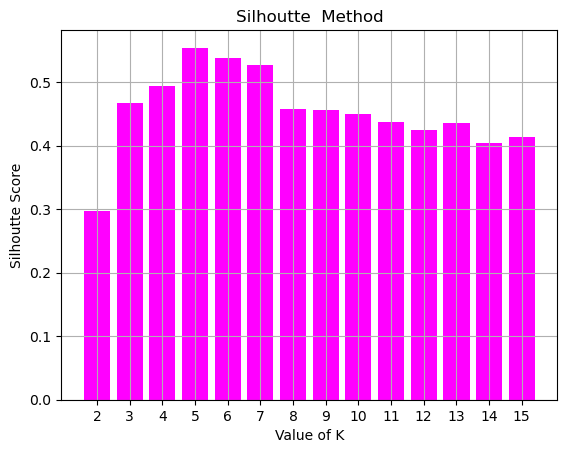

In [34]:
plt.title('Silhoutte  Method')
plt.grid()
plt.xlabel('Value of K')
plt.ylabel('Silhoutte Score')
plt.xticks(range(2,16))
plt.bar(range(2,16), silh, color = 'magenta')

#####  Create the clusters

In [35]:
km = KMeans(random_state= 0, n_clusters= 5, n_init=10)

In [36]:
y = km.fit_predict(x)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [37]:
y

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

In [38]:
km.labels_

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

In [39]:
km.inertia_

44448.45544793371

In [40]:
cents = km.cluster_centers_

In [41]:
cents

array([[88.2       , 17.11428571],
       [55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [25.72727273, 79.36363636],
       [26.30434783, 20.91304348]])

##### Visualize the clustered Data

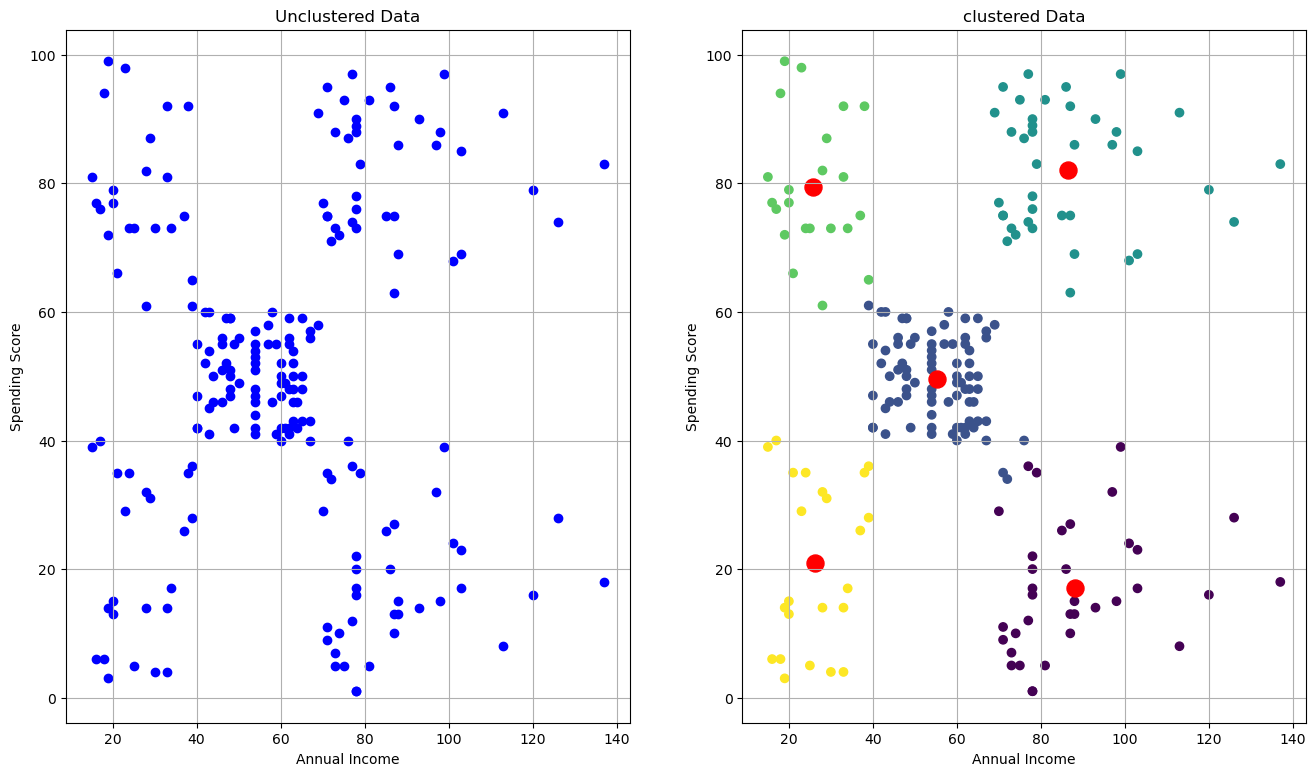

In [50]:

plt.figure(figsize=(16,9))
plt.subplot(121)
plt.title('Unclustered Data')
plt.grid()
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.scatter(x.iloc[:,0], x.iloc[:,1], color = 'b', marker = 'o')

plt.subplot(122)
plt.title('clustered Data')
plt.grid()
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.scatter(x.iloc[:,0], x.iloc[:,1],  marker = 'o', c =y )
plt.scatter(cents[:,0],cents[:,1], color ='red', s = 150)

##### Filter the clusters

In [57]:
# Size of all the clusters
zero = df[ y ==0]
zero.shape

(35, 5)

In [58]:
one = df[y ==1]
one.shape

(81, 5)

In [59]:
two = df[y ==2]
two.shape

(39, 5)

In [60]:
three = df[y ==3]
three.shape

(22, 5)

In [61]:
four = df[y ==4]
four.shape

(23, 5)

In [62]:
35+81+39+22+23

200

In [65]:
# save the values of a cluster as csv
four.to_csv('cluster-four1.csv', index = False)

In [68]:
# save y in the original dataframe 
df['label'] = y

In [67]:
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),label
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4
...,...,...,...,...,...,...
195,196,Female,35,120,79,2
196,197,Female,45,126,28,0
197,198,Male,32,126,74,2
198,199,Male,32,137,18,0


sns.jointplot(x = 'Annual Income (k$)', y = 'Spending Score (1-100)', data = df, hue = 'label', palette = 'tab10')

##### Predict on unknown data

In [83]:
new = pd.DataFrame(data=[[56,78],[121,79],[93,56],[45,41],[76,66],[23,30]], columns= x.columns)

In [84]:
new

,Annual Income (k$),Spending Score (1-100)
0,56,78
1,121,79
2,93,56
3,45,41
4,76,66
5,23,30


In [85]:
y_pred = km.predict(new)

In [86]:
y_pred

array([1, 2, 2, 1, 2, 4])